# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

original = pd.read_csv("C:/Users/ary00/Documents/Project2/archive/english_premier_league_data.csv")
extended = pd.read_csv("C:/Users/ary00/Documents/Project2/season-1819_csv.csv")

The "Football Data: Top 5 Leagues" dataset contains match data for the top 5 football leagues ranging from 2014-2020. From this set we have isolated the English Premier League Dataset, which contains the same information for only the games played in the English Premier League. This dataset describes attributes such as final score, home and away team ratings, possession, match excitement, and many others. Each row corresponds to one game played in the league.

The second dataset we selected is a much more robust collection of attributes regarding the English Premier League ranging from 2018-2019. This "extended" dataset contains attributes such as number of assists, name of the referee, Home/Away team shots, fouls, clears, yellow/red cards, etc. This dataset also contains betting odds from various bookkeepers for various teams.

#### Questions
How accurately can the betting odds predict the winner of a game?
How accurately can the betting odds predict if the game will result in a draw?
How much does being the home team affect the chance of winning a game?
How much does the number of corners a team has affect the amount of goals they score?
How accurately can the halftime score predict the full-time score?
How does the specific referee affect the number of red/yellow cards given?
How well does the number of shots on target predict the number of goals scored compared to the number of shots?

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp.

In [53]:
#extended.drop(extended.iloc[:, 38:61], inplace = True, axis = 1)
extended.drop(extended.columns[len(extended.columns)-1], axis=1, inplace=True)
extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

In [11]:
original.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014


In [27]:
extended.head()
extended.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,...,2.31,22,-1.5,1.98,1.91,2.01,1.95,1.32,5.89,9.48
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,...,2.95,21,-2.0,2.52,2.32,1.72,1.64,1.30,6.06,9.71
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,2.29,22,-1.5,2.27,2.16,1.80,1.73,1.37,5.36,8.49
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,...,2.07,19,-0.5,2.13,2.08,1.85,1.80,1.91,3.81,4.15
379,E0,12/05/2019,Watford,West Ham,1,4,A,0,2,A,...,2.44,19,-0.5,2.25,2.19,1.78,1.72,2.11,3.86,3.41


In [13]:
original.describe()

,Unnamed: 0,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,...,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,1329.500000,5.348571,6.476692,6.238797,51.321429,48.678571,5.378947,4.670677,13.858271,3.818045,...,26.070301,10.986466,1.757143,0.035338,0.040602,1.504511,1.207143,1.207143,1.504511,2017.000000
std,768.020182,1.693194,0.995476,0.990078,12.403523,12.403523,2.731567,2.622373,5.668131,2.549099,...,11.327858,3.523387,1.281851,0.186694,0.206709,1.294090,1.182304,1.182304,1.294090,2.000376
min,0.000000,1.700000,2.400000,1.300000,18.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,664.750000,4.100000,5.800000,5.600000,42.000000,39.000000,3.000000,3.000000,10.000000,2.000000,...,18.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2015.000000
50%,1329.500000,5.300000,6.500000,6.200000,51.000000,49.000000,5.000000,4.000000,13.000000,3.000000,...,25.000000,11.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2017.000000
75%,1994.250000,6.400000,7.100000,6.900000,61.000000,58.000000,7.000000,6.000000,17.000000,5.000000,...,33.000000,13.000000,3.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2019.000000
max,2659.000000,10.000000,10.000000,10.000000,83.000000,82.000000,16.000000,17.000000,43.000000,19.000000,...,79.000000,26.000000,9.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,2020.000000


In [26]:
extended.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,2.126895,20.736842,-0.327632,2.025184,1.962447,2.002395,1.942053,3.332974,4.576342,5.620132
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,0.467750,1.571249,1.056248,0.247373,0.230633,0.226581,0.215442,3.137394,2.019487,5.779454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.450000,17.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.070000,2.930000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.797500,20.000000,-1.000000,1.830000,1.787500,1.817500,1.770000,1.595000,3.410000,2.335000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,2.030000,21.000000,-0.250000,2.000000,1.930000,1.995000,1.940000,2.350000,3.765000,3.415000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,2.330000,22.000000,0.250000,2.190000,2.120000,2.152500,2.092500,3.380000,4.842500,6.565000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,4.170000,24.000000,2.500000,3.150000,3.010000,2.770000,2.650000,24.770000,14.920000,36.050000


In [17]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2660 non-null   int64  
 1   Home Team                      2660 non-null   object 
 2   Away Team                      2660 non-null   object 
 3   Score                          2660 non-null   object 
 4   Half Time Score                2660 non-null   object 
 5   Match Excitement               2660 non-null   float64
 6   Home Team Rating               2660 non-null   float64
 7   Away Team Rating               2660 non-null   float64
 8   Home Team Possession %         2660 non-null   int64  
 9   Away Team Possession %         2660 non-null   int64  
 10  Home Team Off Target Shots     2660 non-null   float64
 11  Home Team On Target Shots      2660 non-null   float64
 12  Home Team Total Shots          2660 non-null   f

In [18]:
extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 62 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

#### Data types
The attributes of the original English Premier League dataset are entirely numerical save for the home/away team names and the scores (which, while numerical, are stored as hyphenated strings). Most of these attributes are also discrete, such as number of red and yellow cards or blocked shots.

The attributes of the extended English Premier League dataset are predominantly numerical as well, although it contains string data such as the home/away team names, date, and categorical data such as FTR or Full-Time Result (which denotes whether the Home or Away team won).

#### Size
The original English Premier League dataset contains 2660 entries across 41 columns, while the extended dataset contains 380 entries across 62 columns. Combined this gives us a total of 3040 entries across 103 columns. 

#### Time frame
While the original English Premier League dataset doesn't contain a date attribute, we know that it holds data from 2014-2020.
The extended dataset contains data from October 2018 to December 2019.

#### Missing Values
As we can see from the .info functions above, neither dataset contains null or missing values.

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

### Football English Premier League Kaggle Dataset
column headers : description : variable_type
'#' : Match number, starts at match 0 and increments for each match in the dataset : integer <br>
Home Team : Name of team who is home : string <br>
Away Team : Name of team who is away : string<br>
Score : Final score of the game, home team score is first and away team score is second : string <br>
Half Time Score: Score of the game at half time, home team score is first and away team score is second : string <br>
Match Excitement : number one through ten rating the excitement of the match (dataset doesnt specify how this number is calculated) : float <br>
Home Team Rating : number one through ten rating how good the home team is (dataset doesnt specify how this number is calculated) : float <br>
Away Team Rating : number one through ten rating how good the away team is (dataset doesnt specify how this number is calculated) : float <br>
Home Team Possesion : time in minutes of how long the home team had possesion of the ball throughout the full duration of the game : integer <br>
Away Team Possesion : time in minutes of how long the away team had possesion of the ball throughout the full duration of the game : integer <br>

In [54]:
original.describe()

,Unnamed: 0,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,...,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,1329.500000,5.348571,6.476692,6.238797,51.321429,48.678571,5.378947,4.670677,13.858271,3.818045,...,26.070301,10.986466,1.757143,0.035338,0.040602,1.504511,1.207143,1.207143,1.504511,2017.000000
std,768.020182,1.693194,0.995476,0.990078,12.403523,12.403523,2.731567,2.622373,5.668131,2.549099,...,11.327858,3.523387,1.281851,0.186694,0.206709,1.294090,1.182304,1.182304,1.294090,2.000376
min,0.000000,1.700000,2.400000,1.300000,18.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,664.750000,4.100000,5.800000,5.600000,42.000000,39.000000,3.000000,3.000000,10.000000,2.000000,...,18.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2015.000000
50%,1329.500000,5.300000,6.500000,6.200000,51.000000,49.000000,5.000000,4.000000,13.000000,3.000000,...,25.000000,11.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2017.000000
75%,1994.250000,6.400000,7.100000,6.900000,61.000000,58.000000,7.000000,6.000000,17.000000,5.000000,...,33.000000,13.000000,3.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2019.000000
max,2659.000000,10.000000,10.000000,10.000000,83.000000,82.000000,16.000000,17.000000,43.000000,19.000000,...,79.000000,26.000000,9.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,2020.000000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Match Excitement'}>,
        <AxesSubplot:title={'center':'Home Team Rating'}>,
        <AxesSubplot:title={'center':'Away Team Rating'}>,
        <AxesSubplot:title={'center':'Home Team Possession %'}>,
        <AxesSubplot:title={'center':'Away Team Possession %'}>],
       [<AxesSubplot:title={'center':'Home Team Off Target Shots'}>,
        <AxesSubplot:title={'center':'Home Team On Target Shots'}>,
        <AxesSubplot:title={'center':'Home Team Total Shots'}>,
        <AxesSubplot:title={'center':'Home Team Blocked Shots'}>,
        <AxesSubplot:title={'center':'Home Team Corners'}>,
        <AxesSubplot:title={'center':'Home Team Throw Ins'}>],
       [<AxesSubplot:title={'center':'Home Team Pass Success %'}>,
        <AxesSubplot:title={'center':'Home Team Aerials Won'}>,
        <AxesSubplot:title={'center':'Home Team Clearances'}>,
        <AxesSubplot:title={'center':'Home Team Fouls'}

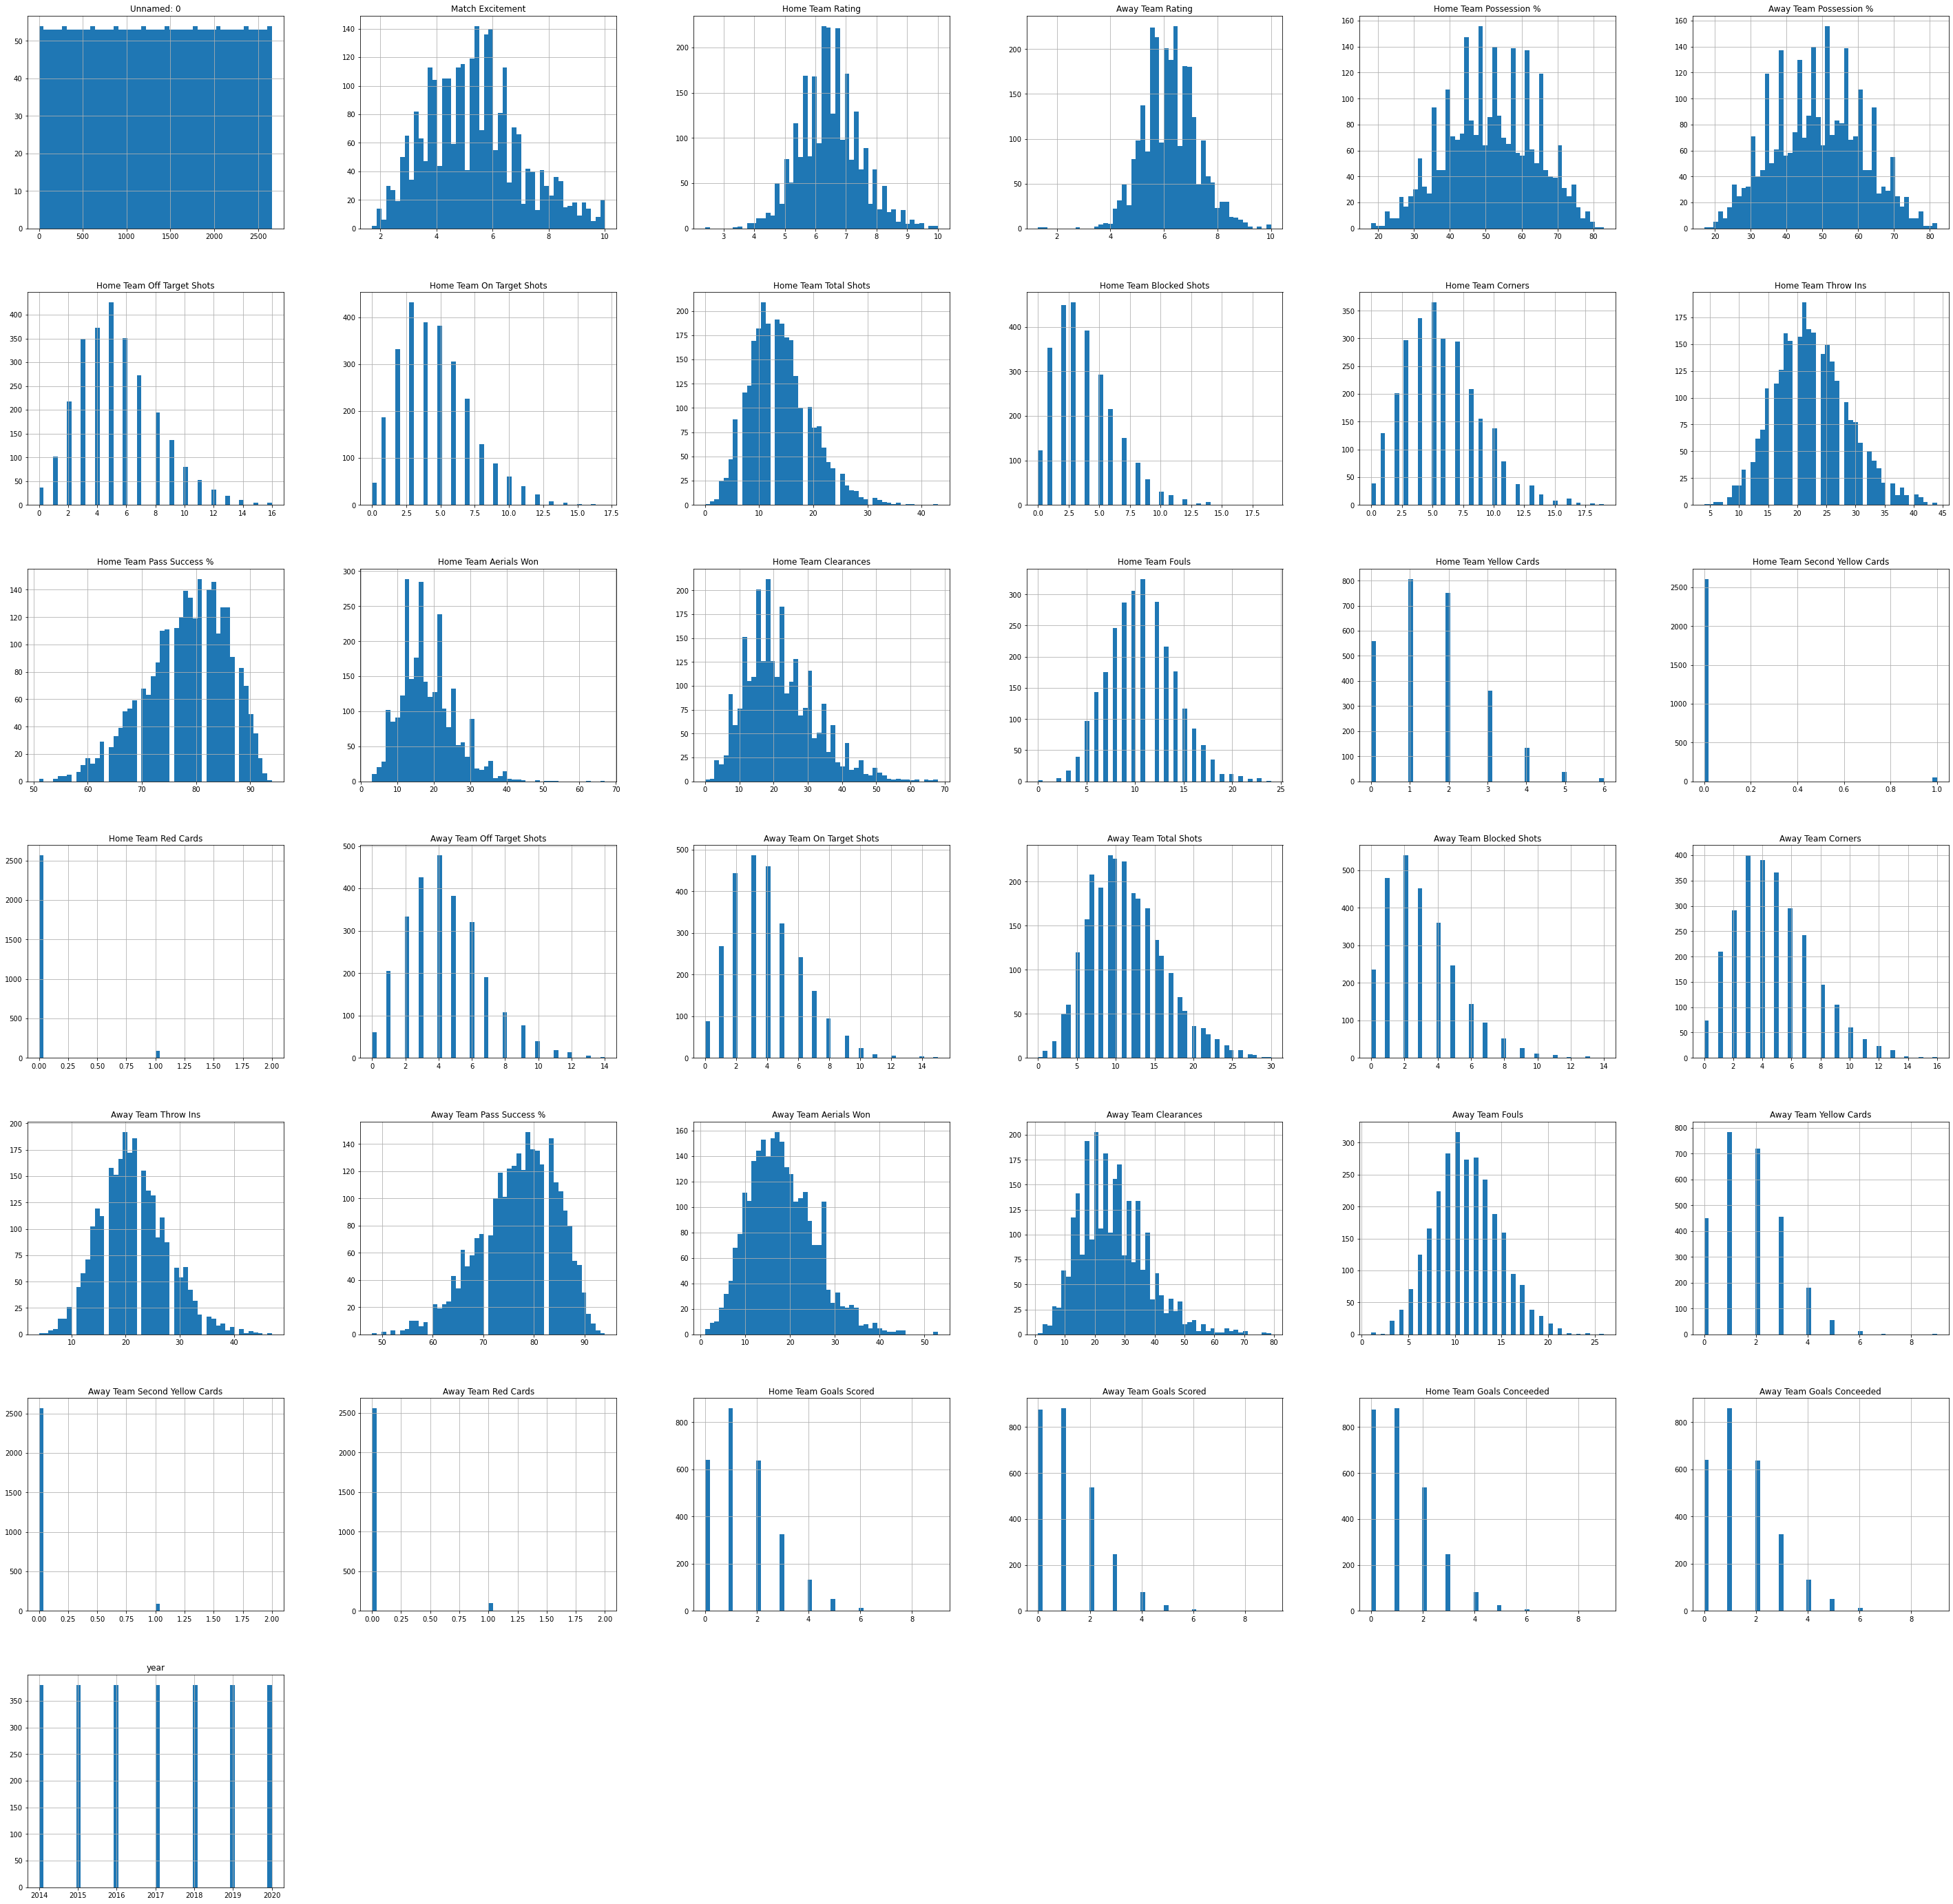

In [64]:
original.hist(bins=50, figsize=(50,50))

<AxesSubplot:xlabel='Home Team Possession %', ylabel='Home Team Goals Scored'>

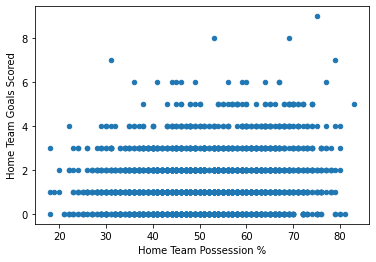

In [73]:
original.plot(kind="scatter", x="Home Team Possession %", y="Home Team Goals Scored", alpha=1)

<AxesSubplot:xlabel='Away Team Rating', ylabel='Away Team Possession %'>

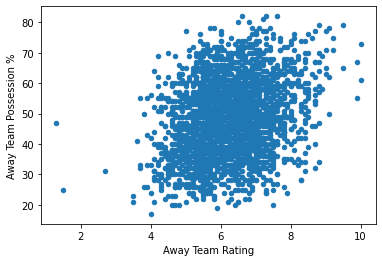

In [74]:
original.plot(kind="scatter", x="Away Team Rating", y="Away Team Possession %", alpha=1)

<AxesSubplot:xlabel='Away Team Clearances', ylabel='Home Team Possession %'>

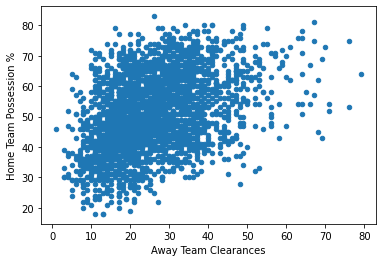

In [75]:
original.plot(kind="scatter", x="Away Team Clearances", y="Home Team Possession %", alpha=1)

### English Premier league season 2018-2019 extended dataset
column headers : description : variable_type
Div: Divison of teams in match : string <br>	
Date: date of match : string	<br>
HomeTeam : Name of Home Team : string (Categorical: can assume the name of any of the teams in the league)	<br>
AwayTeam : Name of Away Team : string (Categorical: can assume the name of any of the teams in the league) 	<br>
FTHG : Full Time Home Team Goals : integer	<br>
FTAG : Full Time Away Team Goals :integer 	<br>
FTR : Full Time Result (Categorical: H=Home Win, D=Draw, A=Away Win) : string <br>
HTHG : Half Time Home Team Goals: integer 	<br>
HTAG : Half Time Away Team Goals: integer <br>
HTR : Half Time Result (Categorical: H=Home Win, D=Draw, A=Away Win) : string 	<br>
Referee : Match Referee	Name : string (Categorical: Refers to one referee in the league)	<br>
HS : Home Team Shots : integer  	<br>
AS : Away Team Shots: integer 	<br>
HST : Home Team Shots on Target : integer 	<br>
AST : Away Team Shots on Target : integer  	<br>
HF : Home Team Fouls Committed : integer  <br>	
AF : Away Team Fouls Committed : integer  	<br>
HC : Home Team Corners : integer 	<br>
AC : Away Team Corners : integer  	<br>
HY : Home Team Yellow Cards: integer 	<br>
AY : Away Team Yellow Cards : integer  	<br>
HR : Home Team Red Cards : integer  	<br>
AR : Away Team Red Cards : integer 	<br>
B365H : Bet365 home team win odds : float  	<br>
B365D : Bet365 draw odds : float 	<br>
B365A : Bet365 away team win odds : float <br>	
BWH : Bet&Win home team win odds : float 	<br>
BWD : Bet&Win draw odds: float <br>
BWA : Bet&Win away team win odds : float 	<br>
IWH : Interwetten home team win odds : float <br>
IWD : Interwetten draw odds : float <br>
IWA : Interwetten away team win odds : float  <br>
PSH : Pinnacle Sports home team win odds : float <br>
PSD : Pinnacle Sports draw odds : float <br>
PSA : Pinnacle Sports away team win odds : float <br>
WHH : William Hill home team win odds : float <br>
WHD : William Hill draw odds : float <br>
WHA : William Hill away team win odds : float <br>

In [55]:
extended.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,5.205237,3.047526,4.295789,4.967132,3.229184,4.527026,5.584342,3.149395,4.368895,5.339579
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,5.133880,2.623373,1.512122,4.667690,3.000273,1.819129,5.760324,2.970813,1.713942,5.648228
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.130000,1.070000,2.950000,1.120000,1.070000,3.040000,1.130000,1.050000,3.000000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,2.250000,1.600000,3.400000,2.287500,1.590000,3.460000,2.330000,1.570000,3.400000,2.250000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,3.300000,2.250000,3.650000,3.300000,2.300000,3.815000,3.430000,2.250000,3.700000,3.275000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,6.000000,3.150000,4.525000,5.525000,3.270000,4.857500,6.535000,3.200000,4.750000,6.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,36.000000,20.000000,12.000000,29.000000,21.510000,14.960000,42.940000,21.000000,13.000000,46.000000


array([[<AxesSubplot:title={'center':'FTHG'}>,
        <AxesSubplot:title={'center':'FTAG'}>,
        <AxesSubplot:title={'center':'HTHG'}>,
        <AxesSubplot:title={'center':'HTAG'}>,
        <AxesSubplot:title={'center':'HS'}>,
        <AxesSubplot:title={'center':'AS'}>],
       [<AxesSubplot:title={'center':'HST'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'AF'}>,
        <AxesSubplot:title={'center':'HC'}>,
        <AxesSubplot:title={'center':'AC'}>],
       [<AxesSubplot:title={'center':'HY'}>,
        <AxesSubplot:title={'center':'AY'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'AR'}>,
        <AxesSubplot:title={'center':'B365H'}>,
        <AxesSubplot:title={'center':'B365D'}>],
       [<AxesSubplot:title={'center':'B365A'}>,
        <AxesSubplot:title={'center':'BWH'}>,
        <AxesSubplot:title={'center':'BWD'}>,
        <AxesSubplot:title={'ce

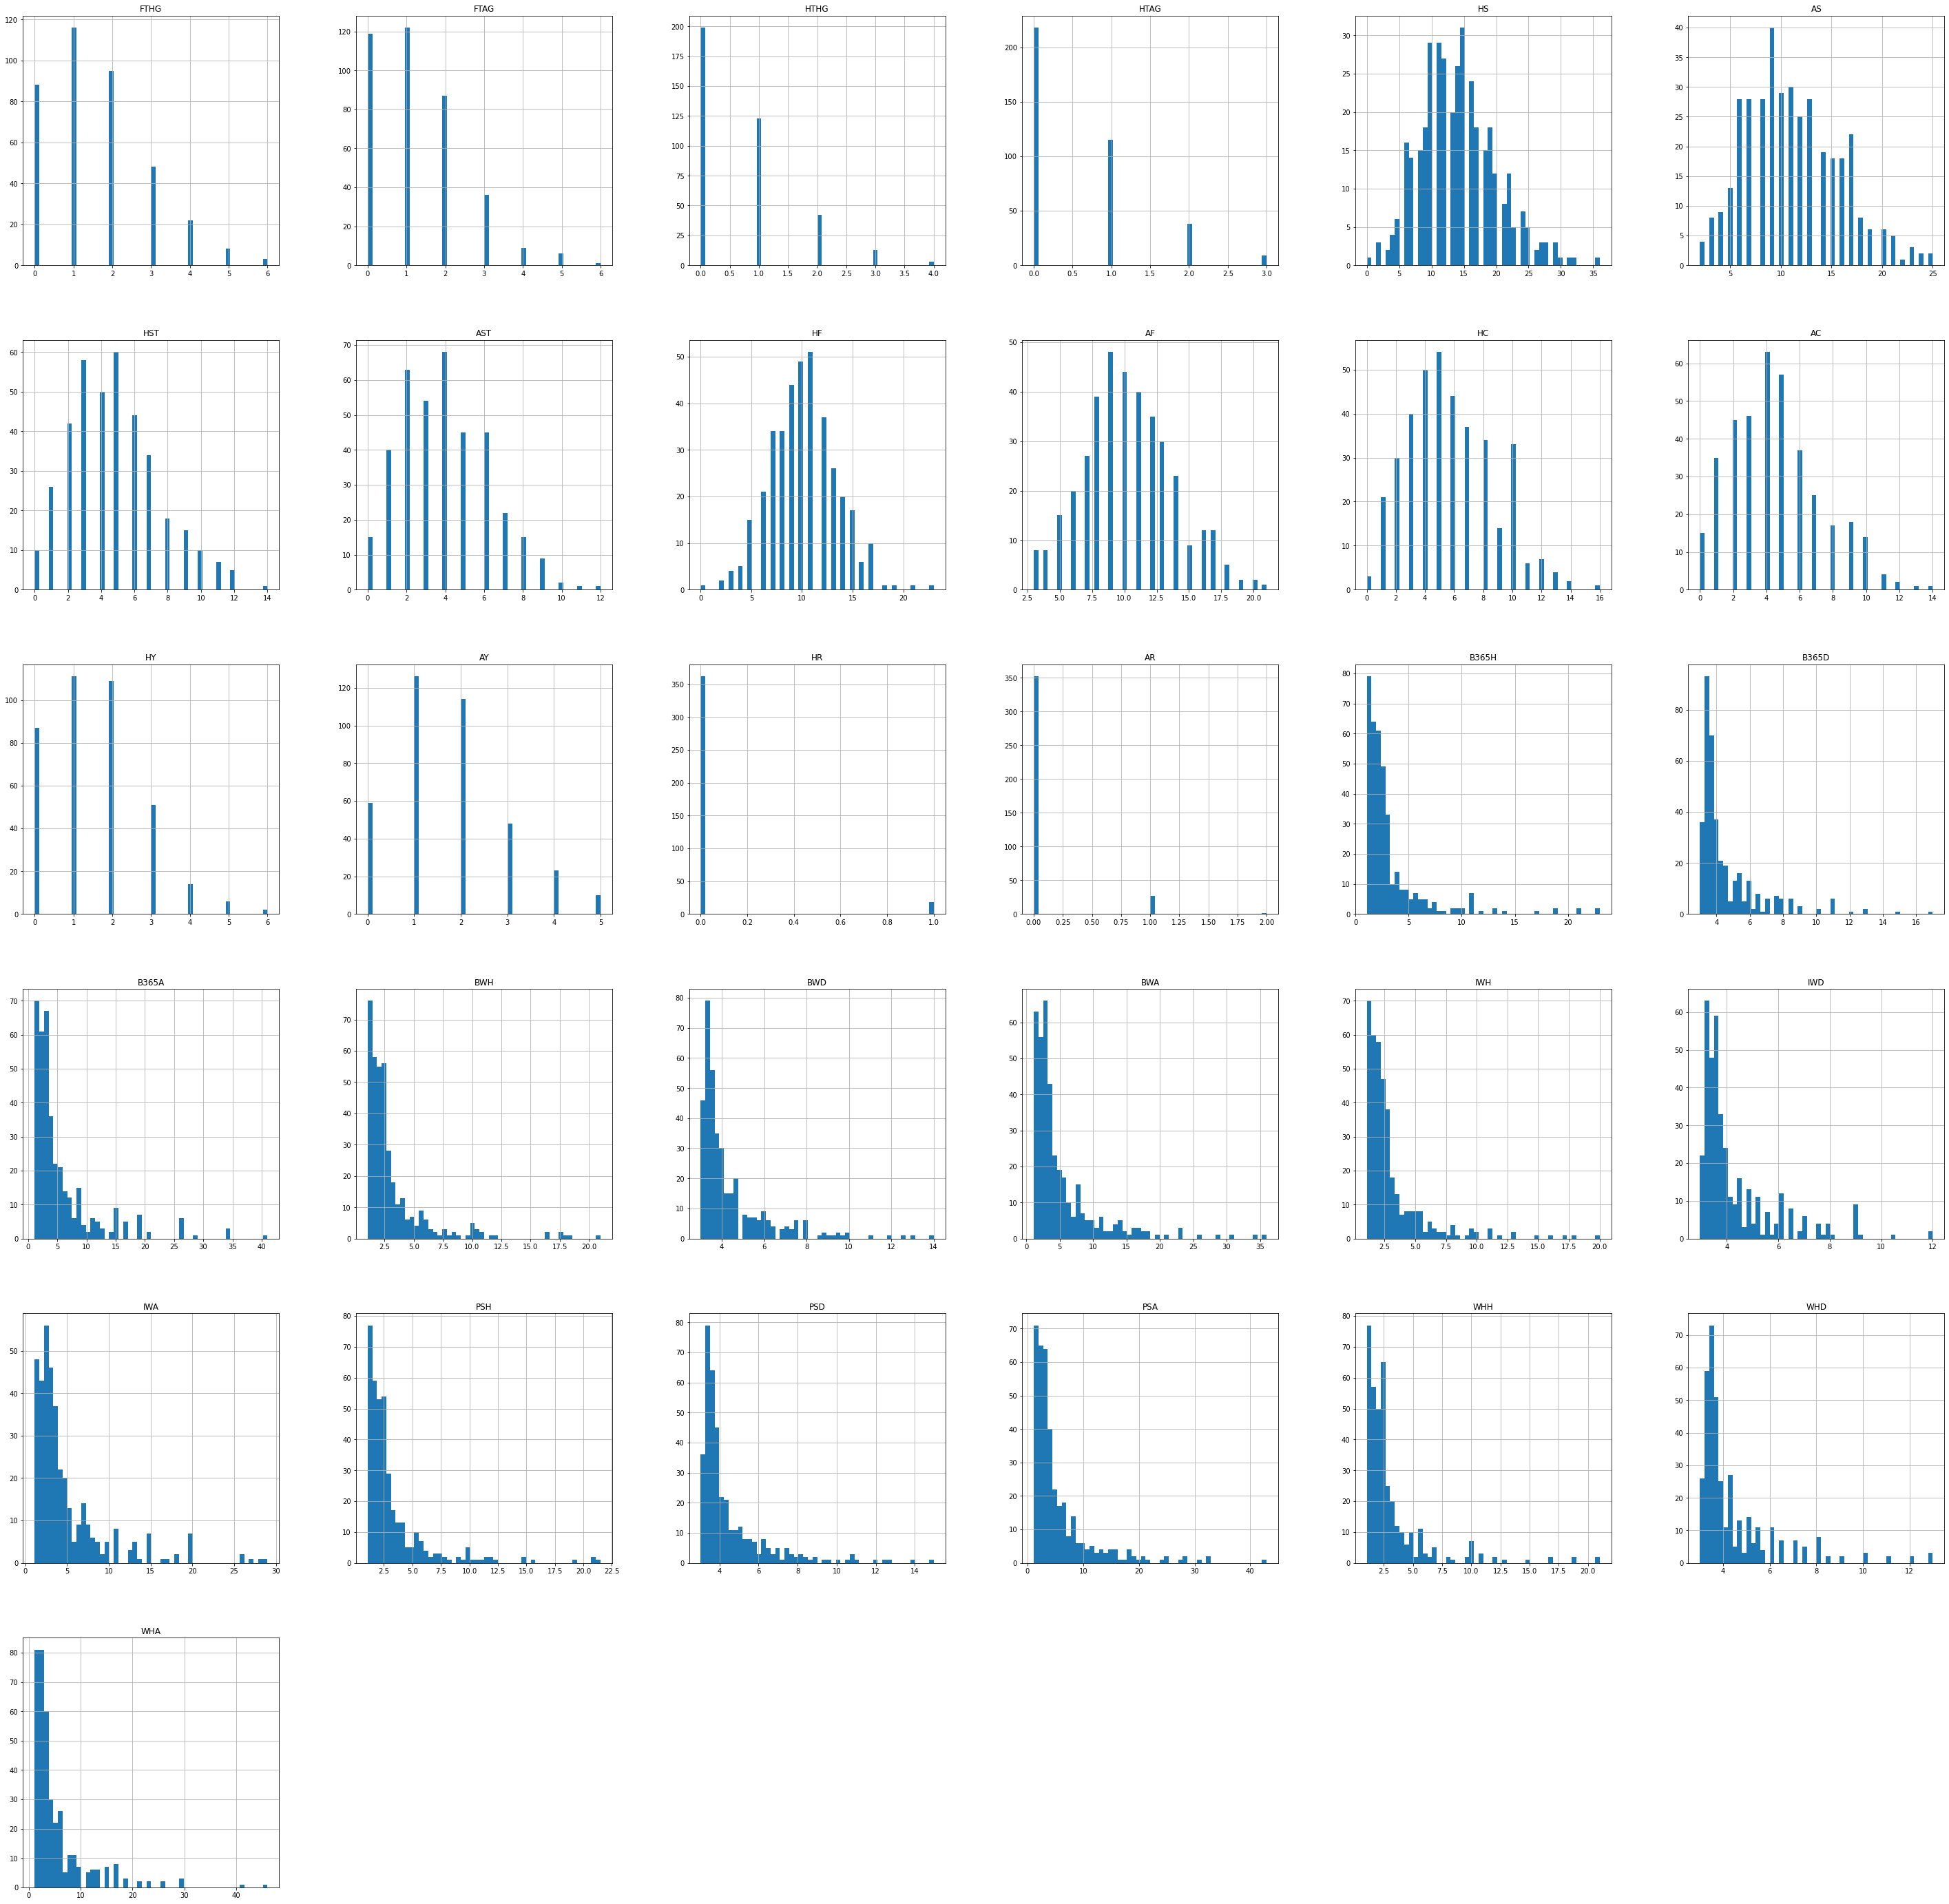

In [63]:
extended.hist()

<AxesSubplot:xlabel='HS', ylabel='FTHG'>

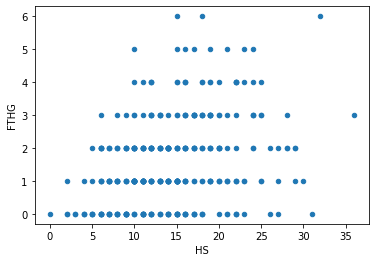

In [68]:
extended.plot(kind="scatter", x="HS", y="FTHG", alpha=1)

<AxesSubplot:xlabel='HF', ylabel='HR'>

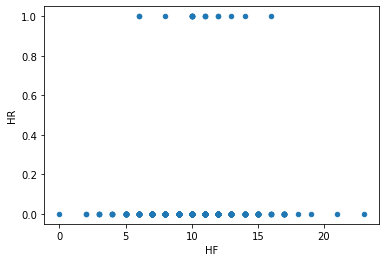

In [69]:
extended.plot(kind="scatter", x="HF", y="HR", alpha=1)

<AxesSubplot:xlabel='HS', ylabel='HST'>

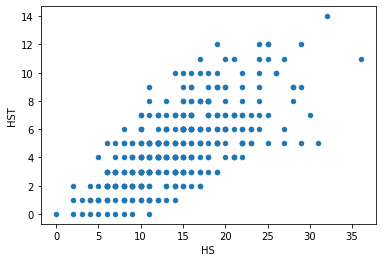

In [71]:
extended.plot(kind="scatter", x="HS", y="HST", alpha=1)

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 